# Problem Statement

 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.


hypothesis generation

Hypothesis: Sales vary significantly across different item types.

Hypothesis: High-value items (higher MRP) in certain item types generate higher sales.

Hypothesis: Perishable item types have higher sales during specific seasons.

Hypothesis: Low-fat or healthier item types have higher sales due to changing consumer preferences.

Hypothesis: Visibility in stores significantly impacts the sales of certain item types.

Hypothesis: Certain item types have higher sales in specific outlet types.



# Loading Packages and Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [2]:
data=pd.read_csv(r"C:\Users\sreen\Downloads\9961_14084_bundle_archive\Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Structure and Content

Item_Identifier:
A unique identifier for each product.

Item_Weight:
The weight of the product.

Item_Fat_Content:
Indicates the fat content level of the product (e.g., Low Fat, Regular).

Item_Visibility:
The percentage of total display area of all products in a store allocated to the particular product.

Item_Type:
The category or type of the product (e.g., Dairy, Soft Drinks, Meat).

Item_MRP:
Maximum Retail Price (MRP) of the product.

Outlet_Identifier:
A unique identifier for each store/outlet.

Outlet_Establishment_Year:
The year in which the store was established.

Outlet_Size:
The size of the store (e.g., Small, Medium, Large).

Outlet_Location_Type:
The type of location where the store is situated (e.g., Tier 1, Tier 2, Tier 3).

Outlet_Type:
The type of outlet (e.g., Supermarket Type1, Supermarket Type2, Grocery Store).

Item_Outlet_Sales:
The target variable representing the sales of the product at a specific store.

Exploratory Data Analysis

In [3]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Numerical-  Item_Weight ,Item_Visibility ,Item_MRP ,Item_Outlet_Sales

Categorical-Item_Fat_Content ,Item_Type ,Outlet_Size ,Outlet_Location_Type ,Outlet_Type

Mixed-Item_Identifier ,Outlet_Identifier ,Outlet_Establishment_Year


# Univarient Analysis

item visibility

In [4]:
data["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:ylabel='Frequency'>

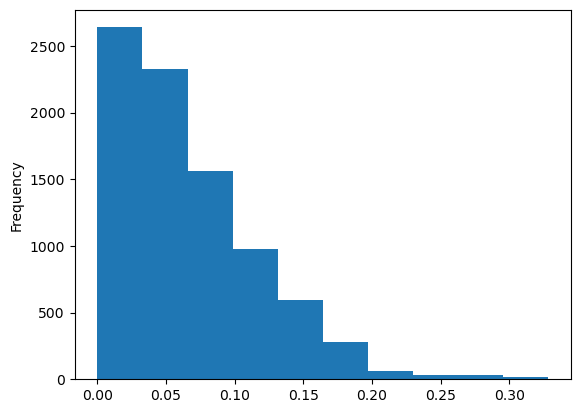

In [5]:
data["Item_Visibility"].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

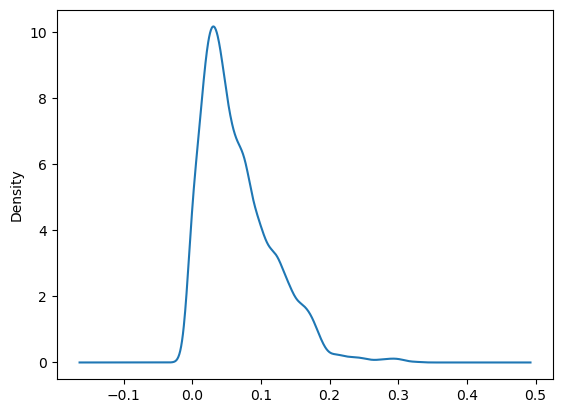

In [6]:
data["Item_Visibility"].plot(kind='kde')

In [7]:
data["Item_Visibility"].skew()

1.1670905496918396

<AxesSubplot:>

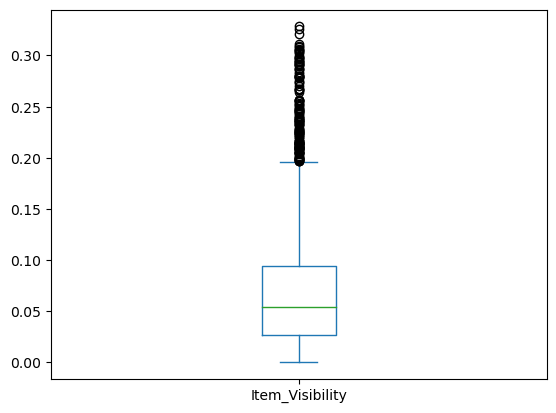

In [8]:
data["Item_Visibility"].plot(kind='box')

In [9]:
data[data["Item_Visibility"]>0.20]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,NaN,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,NaN,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502
334,FDC41,NaN,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,NaN,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,NaN,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,NaN,Tier 3,Grocery Store,185.0924
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920


The skewness value of 1.17 suggests a right-skewed distribution, where the majority of data concentrates on the left side, leading to a longer tail on the right.
While skewness doesn't directly indicate outliers, it's common for right-skewed distributions to have a few extreme values on the right side, which could be considered outliers.Actually the outller data points are relavent.

Item_MRP

In [10]:
data["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

<AxesSubplot:ylabel='Density'>

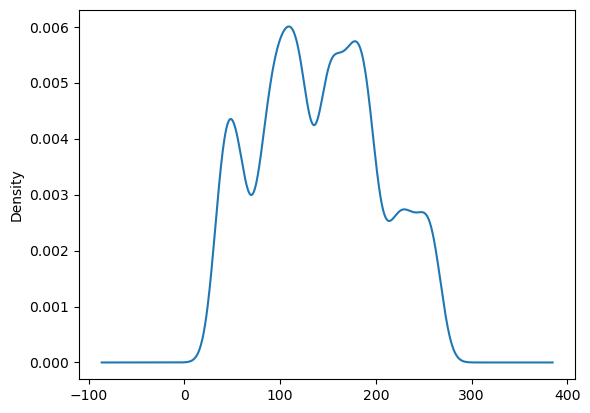

In [11]:
data["Item_MRP"].plot(kind='kde')

In [12]:
data["Item_MRP"].skew()

0.1272022683110526

<AxesSubplot:>

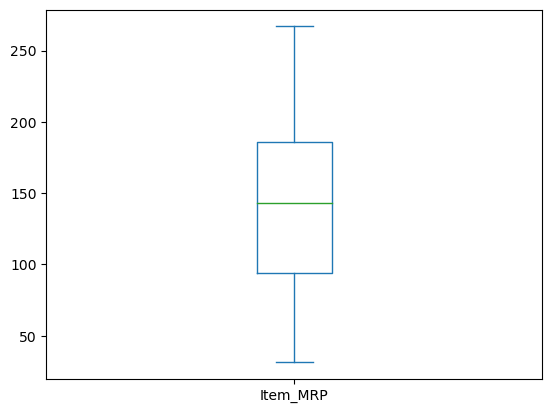

In [13]:
data["Item_MRP"].plot(kind="box")

The skewness value of 0.1272022683110526 suggests a slight rightward skew in the distribution. While the data distribution leans towards the right, the skewness is relatively low, indicating a fairly balanced distribution with minimal asymmetry.

Item_Outlet_Sales

In [14]:
data["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:ylabel='Density'>

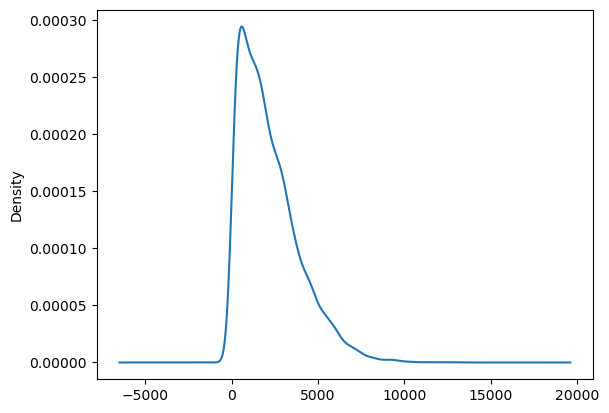

In [15]:
data["Item_Outlet_Sales"].plot(kind="kde")

In [16]:
data["Item_Outlet_Sales"].skew()

1.1775306028542796

<AxesSubplot:>

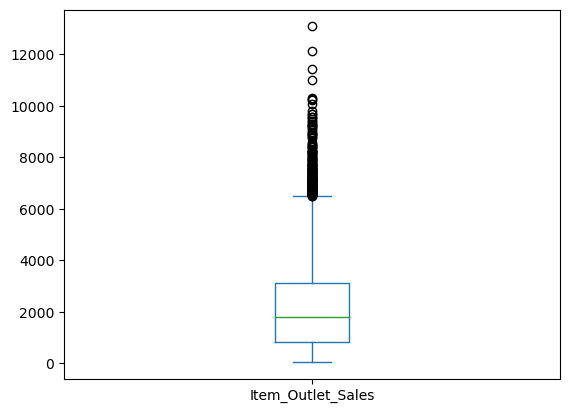

In [17]:
data["Item_Outlet_Sales"].plot(kind="box")

In [18]:
data[data["Item_Outlet_Sales"]>6500]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,NaN,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,NaN,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,NaN,Tier 2,Supermarket Type1,7588.1226


The skewness value of 1.1775306028542796 indicates a moderately strong rightward skew in the distribution. In a right-skewed distribution, the majority of data points are concentrated on the left side, and the tail on the right side is longer or fatter. This skewness suggests a notable asymmetry in the data towards higher values. In right-skewed distributions, it's common to have a few extreme values on the right side, which could be considered outliers.Actually the points are relavent.

Item_Fat_Content

In [19]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

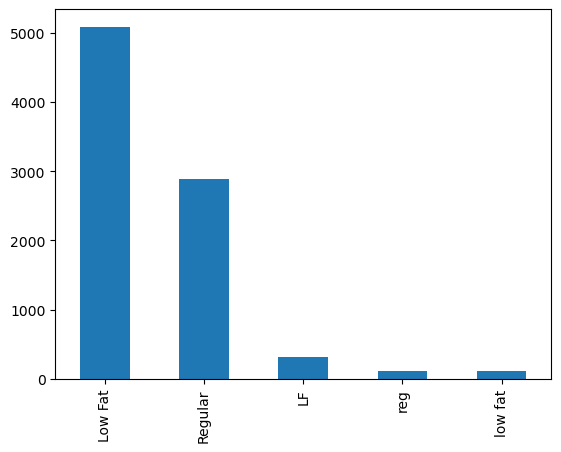

In [20]:
data["Item_Fat_Content"].value_counts().plot(kind='bar')

In [21]:
fat_content_mapping={'Low Fat': 'low fat', 'LF': 'low fat', 'low fat': 'low fat',
                     'Regular': 'regular', 'reg': 'regular'}

data["Item_Fat_Content"]=data["Item_Fat_Content"].map(fat_content_mapping)

data["Item_Fat_Content"].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

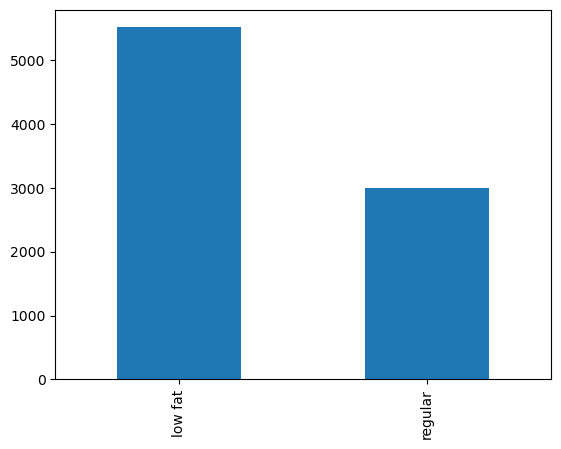

In [22]:
data["Item_Fat_Content"].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Item_Fat_Content'>

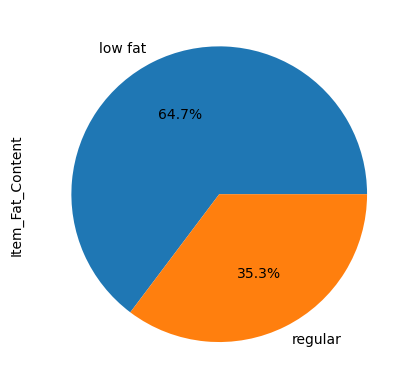

In [23]:
data["Item_Fat_Content"].value_counts().plot(kind='pie',autopct='%0.1f%%')

About 65% of the products in the data are low fat, while around 35% are regular fat.

Item_Type

In [24]:
data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:>

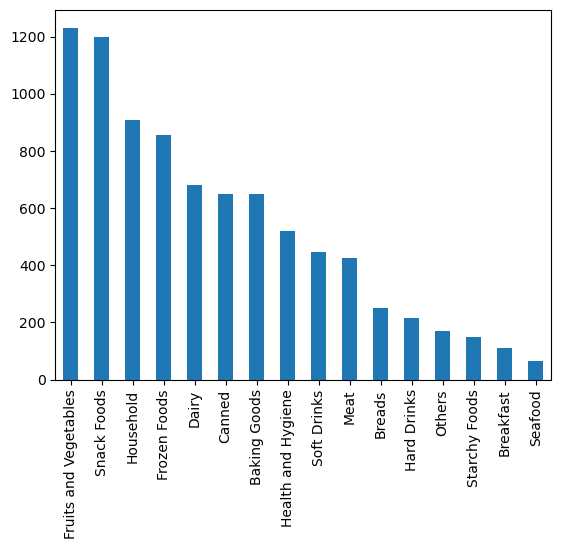

In [25]:
data["Item_Type"].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Item_Type'>

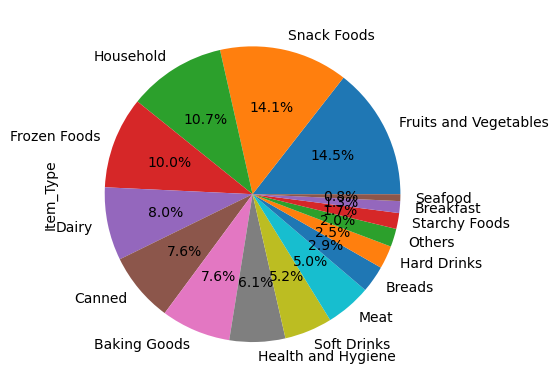

In [26]:
data["Item_Type"].value_counts().plot(kind='pie',autopct='%0.1f%%')

Outlet_Type

In [27]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:>

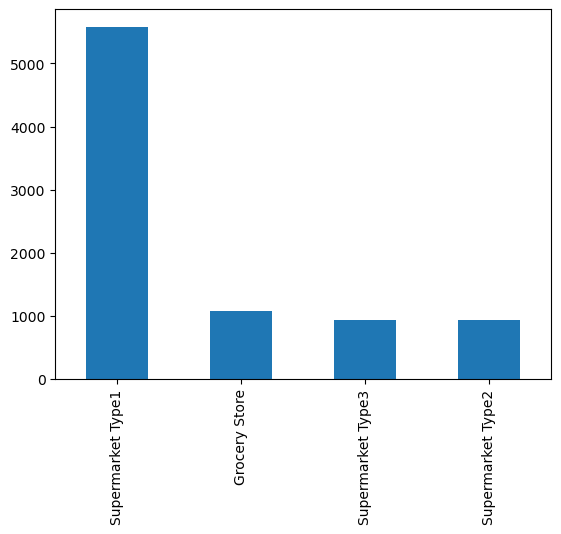

In [28]:
data['Outlet_Type'].value_counts().plot(kind="bar")

Outlet_Location_Type

In [29]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:ylabel='Outlet_Location_Type'>

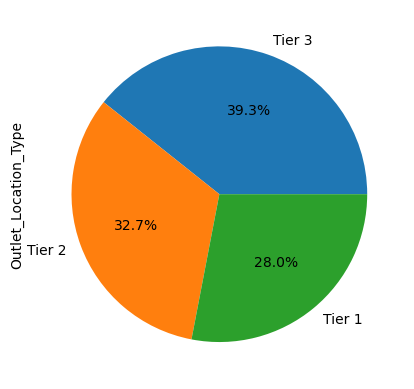

In [30]:
data['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Outlet_Size

In [31]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

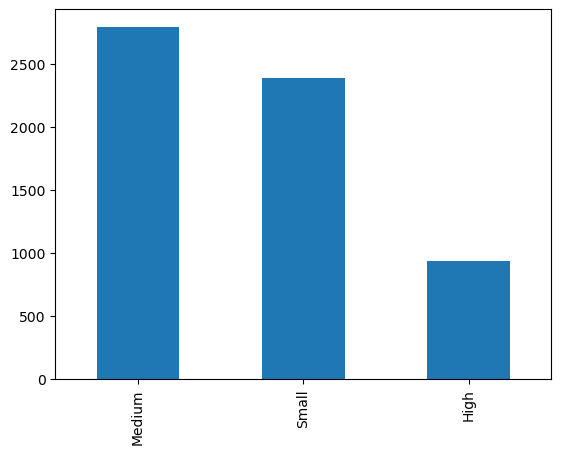

In [32]:
data['Outlet_Size'].value_counts().plot(kind="bar")


The dataset reveals a prevalence of medium-sized outlets, followed by small-sized outlets, and finally, high-sized outlets in descending order of count.

# Bivarient analysis

   numerical-numerical

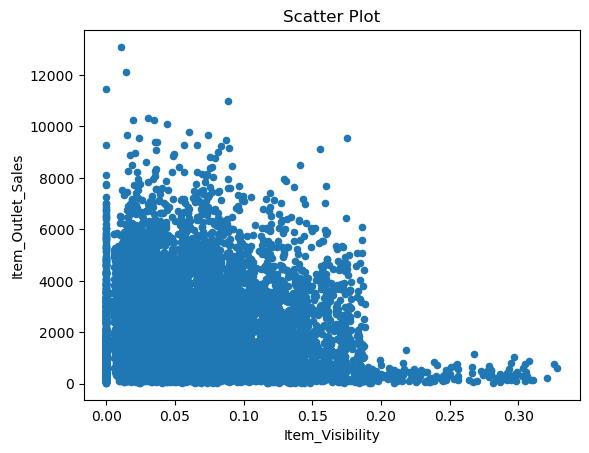

In [33]:
# Assuming data is your DataFrame
data.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales', title='Scatter Plot')

# Show the plot
plt.show()

In [34]:
correlation = data['Item_Visibility'].corr(data['Item_Outlet_Sales'])
correlation

-0.1286246122207703

There is a slight negative correlation between item visibility aand item outlet sales

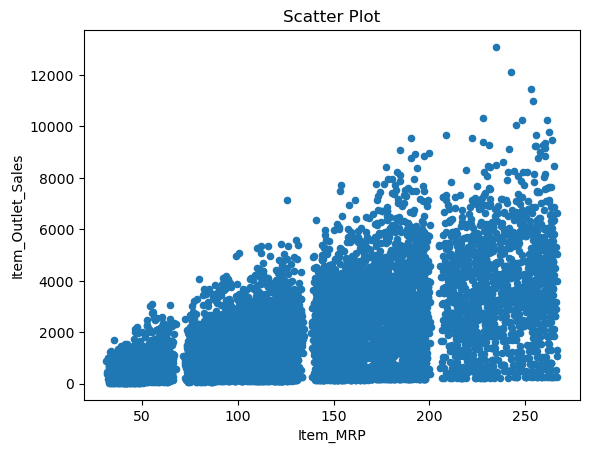

In [35]:
# Assuming data is your DataFrame
data.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', title='Scatter Plot')

# Show the plot
plt.show()

In [36]:
correlation = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
correlation

0.5675744466569194

There is a positive correlation between item mrp and item outlet sales

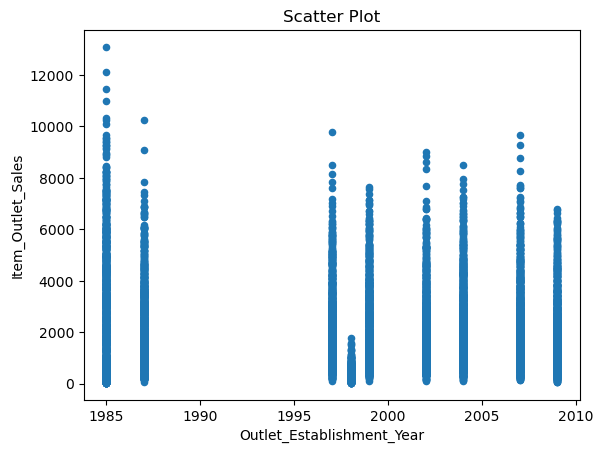

In [37]:
data.plot.scatter(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', title='Scatter Plot')

# Show the plot
plt.show()

In [38]:

correlation = data['Outlet_Establishment_Year'].corr(data['Item_Outlet_Sales'])
correlation

-0.04913497044082088

There is a slightly negative correlation between outlet eztablishment year and item output sales.It shows that the old outlet has more sales.

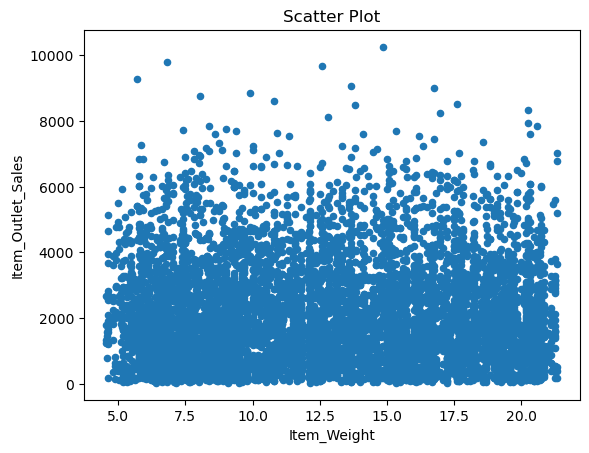

In [39]:
data.plot.scatter(x='Item_Weight', y='Item_Outlet_Sales', title='Scatter Plot')

# Show the plot
plt.show()

In [40]:
correlation = data['Item_Weight'].corr(data['Item_Outlet_Sales'])
correlation

0.014122739280056463

Given the absence of a meaningful correlation between item weight and item outlet sales, it appears reasonable to consider removing this variable from our analysis.

In [41]:
pd.crosstab(data['Item_Fat_Content'],data['Item_Type'],normalize='columns')*100


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
low fat,50.771605,55.776892,37.272727,52.542373,61.290323,52.570093,51.136364,100.0,100.0,100.0,40.0,100.0,57.8125,57.666667,84.044944,55.405405
regular,49.228395,44.223108,62.727273,47.457627,38.709677,47.429907,48.863636,0.0,0.0,0.0,60.0,0.0,42.1875,42.333333,15.955056,44.594595


categorical and numerical

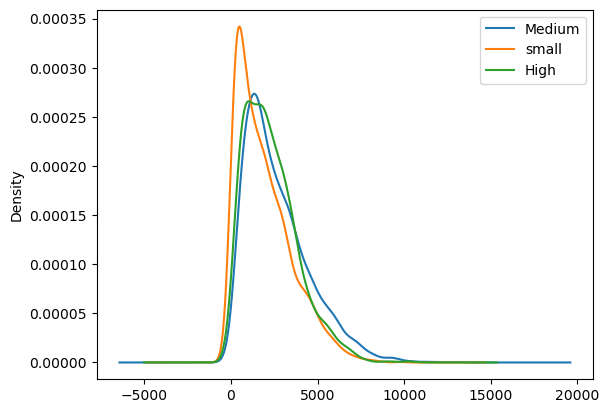

In [42]:

data[data['Outlet_Size']=='Medium']['Item_Outlet_Sales'].plot(kind='kde',label='Medium')
data[data['Outlet_Size']=='Small']['Item_Outlet_Sales'].plot(kind='kde',label='small')
data[data['Outlet_Size']=='High']['Item_Outlet_Sales'].plot(kind='kde',label='High')
plt.legend()
plt.show()

Missing value

In [43]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [44]:
mode=data['Outlet_Size'].mode()
mode
data['Outlet_Size']=data['Outlet_Size'].fillna(mode[0])
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [45]:
data['Outlet_Size'].isnull().sum()

0

In [46]:
mean=data["Item_Weight"].mean()
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [47]:
data['Item_Weight'].isnull().sum()

0

Feature Engineering

In [48]:
current_year = pd.to_datetime('today').year

data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']

# Encoding Categorical Variables

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label encoding

In [50]:

LE=LabelEncoder()

In [51]:
data['Item_Fat_Content']=LE.fit_transform(data['Item_Fat_Content'])
data['Outlet_Size']=LE.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=LE.fit_transform(data['Outlet_Location_Type'])
data['Item_Identifier']=LE.fit_transform(data['Item_Identifier'])
data['Outlet_Identifier']=LE.fit_transform(data['Outlet_Identifier'])

One-hot encoding

In [52]:
# One-hot encoding for 'Item_Type' and 'Outlet_Type'
data = pd.get_dummies(data, columns=['Item_Type', 'Outlet_Type'], prefix=['Item_Type', 'Outlet_Type'])

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age','Outlet_Establishment_Year']] = scaler.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age','Outlet_Establishment_Year']])


In [54]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,-0.841872,0,-0.970732,1.747454,9,0.139541,1,0,3735.1380,...,0,0,0,0,0,0,0,1,0,0
1,8,-1.641706,1,-0.908111,-1.489023,3,1.334103,1,2,443.4228,...,0,0,0,0,1,0,0,0,1,0
2,662,1.098554,0,-0.956917,0.010040,9,0.139541,1,0,2097.2700,...,1,0,0,0,0,0,0,1,0,0
3,1121,1.500838,1,-1.281758,0.660050,0,0.020085,1,2,732.3800,...,0,0,0,0,0,0,1,0,0,0
4,1297,-0.929428,0,-1.281758,-1.399220,1,-1.293934,0,2,994.7052,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,0,-0.181193,1.180783,1,-1.293934,0,2,2778.3834,...,0,0,0,1,0,0,0,1,0,0
8519,897,-1.059578,1,-0.371154,-0.527301,7,0.497909,1,1,549.2850,...,0,0,0,0,0,0,0,1,0,0
8520,1357,-0.534243,0,-0.599784,-0.897208,6,0.736822,2,1,1193.1136,...,0,0,0,0,0,0,0,1,0,0
8521,681,-1.336444,1,1.532880,-0.607977,3,1.334103,1,2,1845.5976,...,0,0,0,1,0,0,0,0,1,0


# modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
X = data.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'], axis=1)
y = data['Item_Outlet_Sales']

# Linear Regression

In [57]:

model = LinearRegression()

In [58]:
# Train the model
model.fit(X, y)

LinearRegression()

In [59]:
r2 = model.score(X, y)
print(f'R-squared Score (Training): {r2}')

R-squared Score (Training): 0.5626995395480285


# Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
# Initialize Lasso regression model with regularization parameter alpha
lasso_model = Lasso(alpha=1.0)
# Train the model
lasso_model.fit(X, y)
# Make predictions on the train set
predictions = lasso_model.predict(X)
# Evaluate the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = model.score(X,y)
print(f'R^2 Score: {r2}')

# Get the coefficients (weights) of the model
coefficients = lasso_model.coef_
print('Coefficients:', coefficients)

Mean Squared Error: 1273632.1247883178
R^2 Score: 0.5626995395480285
Coefficients: [-7.60310913e-01  4.14359350e+01 -1.47531282e+01  9.68155787e+02
  1.26223475e+01  0.00000000e+00 -1.24572097e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.93345634e+01 -2.06081142e+01
 -9.80839212e+00  2.90211400e+01  0.00000000e+00 -0.00000000e+00
 -2.29064682e+01  0.00000000e+00 -0.00000000e+00  5.53403478e+01
 -0.00000000e+00 -8.90391965e-01  0.00000000e+00 -1.93228088e+03
  0.00000000e+00 -3.29915079e+02  1.41455760e+03]


# Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model with regularization parameter alpha
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X, y)

# Make predictions on the train set
pred = ridge_model.predict(X)

# Evaluate the model
r2 = r2_score(y, pred)
print(f'R^2 Score: {r2}')

# Get the coefficients (weights) of the model
coefficients = ridge_model.coef_
print('Coefficients:', coefficients)


R^2 Score: 0.5626992990534893
Coefficients: [-1.45570444e+00  4.06559333e+01 -1.55191002e+01  9.69071443e+02
  1.96519104e+01  6.83688945e+00 -1.67191090e+01 -6.15420084e+00
 -3.72159547e+00  4.90567830e+00  1.97628865e+01 -4.52058010e+01
 -3.22617117e+01  2.35251163e+01 -6.96984254e+00 -1.66462176e+01
 -4.53270213e+01 -4.06600032e+00 -3.08362781e+01  1.73507935e+02
 -1.57453422e+01 -3.29676564e+01  1.82000513e+01 -1.72138316e+03
  2.17783411e+02 -1.34669524e+02  1.63826927e+03]


# RandomForest

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X, y)

# Make predictions on the train set
predictions = random_forest.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 181973.71504576618
R^2 Score: 0.9375047182488876


# XGBoost 

In [203]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBRegressor
# Initialize the XGBoost Regressor
xgboost_model = XGBRegressor(n_estimators=150, learning_rate=0.4, max_depth=8, random_state=42)

# Fit the model to the training data
xgboost_model.fit(X, y)

# Make predictions on the train set
predictions = xgboost_model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 39232.880003878294
R^2 Score: 0.9865262415006842


Testing

In [67]:

test_data=pd.read_csv(r"C:\Users\sreen\Downloads\9961_14084_bundle_archive\Test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [68]:
#handling missing value
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [69]:
mode=test_data['Outlet_Size'].mode()
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(mode[0])
mean=test_data["Item_Weight"].mean()
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

In [70]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [71]:
current_year = pd.to_datetime('today').year

test_data['Outlet_Age'] = current_year - test_data['Outlet_Establishment_Year']
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,25
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,17
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,26
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,17
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,39


In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [73]:

LE = LabelEncoder()

test_data['Item_Fat_Content'] = LE.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size'] = LE.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type'] = LE.fit_transform(test_data['Outlet_Location_Type'])
test_data['Item_Identifier'] = LE.fit_transform(test_data['Item_Identifier'])
test_data['Outlet_Identifier'] = LE.fit_transform(test_data['Outlet_Identifier'])


In [74]:
# One-hot encoding for 'Item_Type' and 'Outlet_Type'
data = pd.get_dummies(test_data, columns=['Item_Type', 'Outlet_Type'], prefix=['Item_Type', 'Outlet_Type'])

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age','Outlet_Establishment_Year']] = scaler.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age','Outlet_Establishment_Year']])

In [76]:
tX = data.drop([ 'Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'], axis=1)


Prediction XGBoost

In [77]:
Xpredictions = xgboost_model.predict(tX)
Xpredictions

array([5376.557 , 5885.0005, 1907.268 , ..., 6096.707 , 5734.9067,
       6903.7295], dtype=float32)

prediction random forest

In [78]:
R_predictions = random_forest.predict(tX)
R_predictions

array([4470.454178, 4617.243104,  651.78491 , ..., 4678.496704,
       4333.199508, 4618.048722])

# Summary

### Problem Statement:
The project aimed to predict the sales of 1559 products across 10 stores based on various attributes.
Hypotheses were generated to explore relationships between sales and different factors.

Exploratory Data Analysis (EDA):
Checked for missing values; found missing values in 'Item_Weight' and 'Outlet_Size'.
Identified numerical, categorical, and mixed data types in the dataset.
Conducted univariate analysis for 'Item_Visibility' and 'Item_MRP'.
Explored the distribution and skewness of 'Item_Visibility', 'Item_MRP', and 'Item_Outlet_Sales'.
Examined outliers in 'Item_Visibility' and 'Item_Outlet_Sales'.
Analyzed categorical columns like 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', and 'Outlet_Type'.

Bivariate Analysis:
Explored relationships between numerical features like 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Weight', and 'Item_Outlet_Sales'.
Investigated categorical-to-categorical relationships and categorical-to-numerical relationships.

Handling Missing Values:
Imputed missing values in 'Outlet_Size' using the mode.
Imputed missing values in 'Item_Weight' using the mean.

Feature Engineering:
Created a new feature 'Outlet_Age' based on the difference between the current year and 'Outlet_Establishment_Year'.

Encoding Categorical Variables:
Applied label encoding to 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Identifier', and 'Outlet_Identifier'.
Utilized one-hot encoding for 'Item_Type' and 'Outlet_Type'.

Modeling:
Split the data into features (X) and target variable (y).
Trained Linear Regression, Lasso Regression, Ridge Regression, RandomForest, and XGBoost models.
Evaluated model performance using Mean Squared Error (MSE) and R-squared (R^2) scores.

Model Performance:
Linear Regression R^2 Score: 0.56
Lasso  Regression R^2 Score: 0.5626
Ridge Regression R^2 Score: 0.5626
RandomForest R^2 Score: 0.9377
XGBoost R^2 Score: 0.9868

Conclusion:
The RandomForest and XGBoost models performed well in predicting sales, with R^2 scores of 0.937 and 0.987, respectively.
Feature engineering, encoding categorical variables, and handling missing values contributed to model improvement.